[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/upm-classes/image_mining_2021_2022/blob/main/03_image_processing_spatial_filtering.ipynb)

# Gamma and log contrast adjustment
This example adjusts image contrast by performing a Gamma and a Logarithmic correction on the input image.

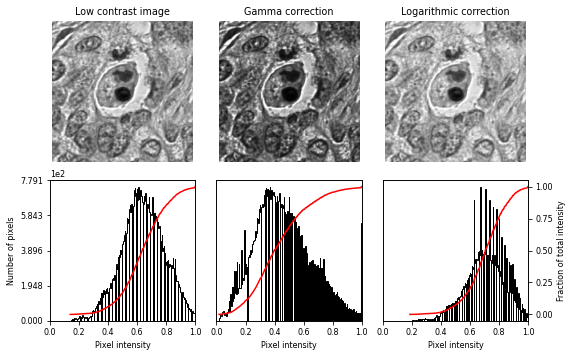

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import os.path
import cv2
from skimage import img_as_float
from skimage import exposure

matplotlib.rcParams['font.size'] = 8

def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.
    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image

img = cv2.imread('images/1-2556_Brightness.tif', 0)

# Gamma
gamma_corrected = exposure.adjust_gamma(img, 2)


# Logarithmic
logarithmic_corrected = exposure.adjust_log(img, 1)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 3), dtype=object)
axes[0, 0] = plt.subplot(2, 3, 1)
axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0])
axes[1, 0] = plt.subplot(2, 3, 4)
axes[1, 1] = plt.subplot(2, 3, 5)
axes[1, 2] = plt.subplot(2, 3, 6)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(gamma_corrected, axes[:, 1])
ax_img.set_title('Gamma correction')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(logarithmic_corrected, axes[:, 2])
ax_img.set_title('Logarithmic correction')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

# Histogram Equalization
This examples enhances an image with low contrast, using a method called histogram equalization, which "spreads out the most frequent intensity values" in an image [1]_. The equalized image has a roughly linear cumulative distribution function.
While histogram equalization has the advantage that it requires no parameters, it sometimes yields unnatural looking images. An alternative method is contrast stretching, where the image is rescaled to include all intensities that fall within the 2nd and 98th percentiles [2]_.
.. [1] https://en.wikipedia.org/wiki/Histogram_equalization .. [2] http://homepages.inf.ed.ac.uk/rbf/HIPR2/stretch.htm

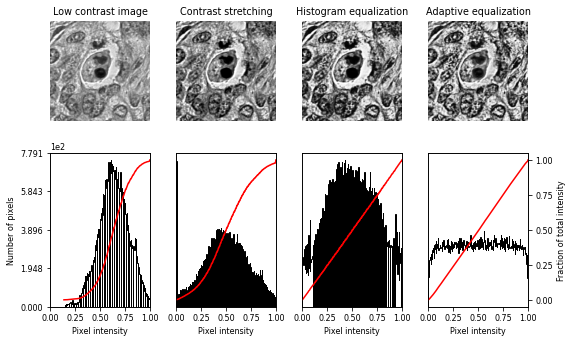

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2

from skimage import data, img_as_float
from skimage import exposure

matplotlib.rcParams['font.size'] = 8


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = cv2.imread('images/1-2556_Brightness.tif', 0) # 0 is for a grayscale


# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 4), dtype=object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

# Histogram matching
This example demonstrates the feature of histogram matching. It manipulates the pixels of an input image so that its histogram matches the histogram of the reference image. If the images have multiple channels, the matching is done independently for each channel, as long as the number of channels is equal in the input image and the reference.
Histogram matching can be used as a lightweight normalisation for image processing, such as feature matching, especially in circumstances where the images have been taken from different sources or in different conditions (i.e. lighting).

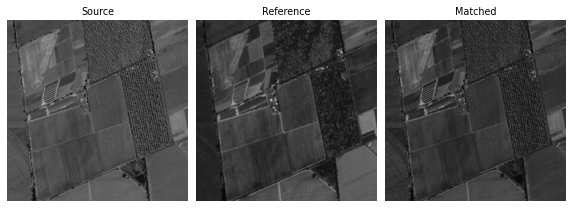

In [3]:
import matplotlib.pyplot as plt

import cv2

from skimage import data
from skimage import exposure
from skimage.io import imread
from skimage.exposure import match_histograms


reference = imread('images/Ikonos_Corte_Vina_B1.tif')
image = imread('images/Ikonos_Corte_Vina_Pan.tif')

matched = match_histograms(image, reference, multichannel=False)
matched = matched.astype(np.uint8)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(image, cmap='gray')
ax1.set_title('Source')
ax2.imshow(reference,cmap='gray')
ax2.set_title('Reference')
ax3.imshow(matched,cmap='gray')
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

To illustrate the effect of the histogram matching, we plot for each RGB channel, the histogram and the cumulative histogram. Clearly, the matched image has the same cumulative histogram as the reference image for each channel.

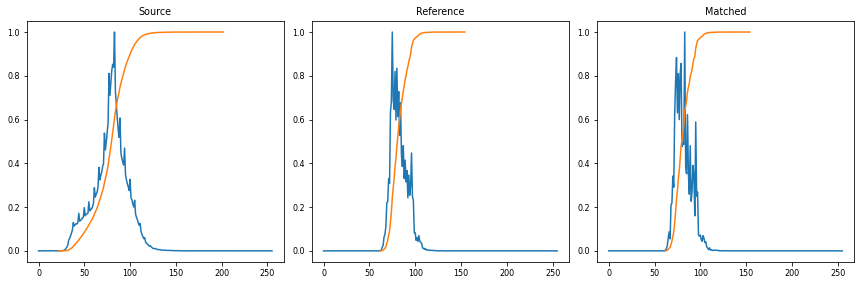

In [4]:
import numpy as np

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

for i, img in enumerate((image, reference, matched)):
    #for c, c_color in enumerate(('red', 'green', 'blue')):
    img_hist, bins = exposure.histogram(img, source_range='dtype')
    #print(np.unique(img))
    axes[i].plot(bins, img_hist / img_hist.max())
    img_cdf, bins = exposure.cumulative_distribution(img)
    axes[i].plot(bins, img_cdf)
    #axes[c, 0].set_ylabel(c_color)

axes[0].set_title('Source')
axes[1].set_title('Reference')
axes[2].set_title('Matched')

plt.tight_layout()
plt.show()

# Geometric transformation

## Scaling

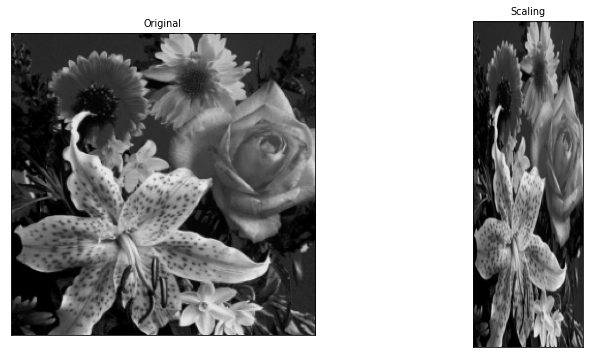

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = cv2.imread('images/FLORES.jpg')

# res = cv2.resize(img, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
# OR

height, width = img.shape[:2]
res = cv2.resize(img,(1*width, 3*height), interpolation = cv2.INTER_CUBIC)

plt.figure(figsize=(12,6))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(res),plt.title('Scaling')
plt.xticks([]), plt.yticks([])
plt.show()

## Traslation

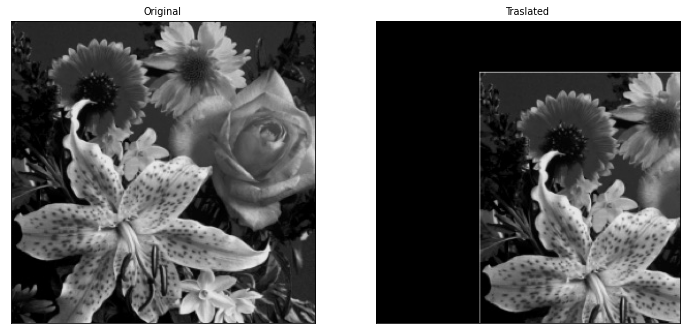

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = cv2.imread('images/FLORES.jpg')
print=img.shape
print=img.size

rows,cols,color=img.shape

#print(rows)
#print(cols)

M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))

plt.figure(figsize=(12,6))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Traslated')
plt.xticks([]), plt.yticks([])
plt.show()

## Rotation

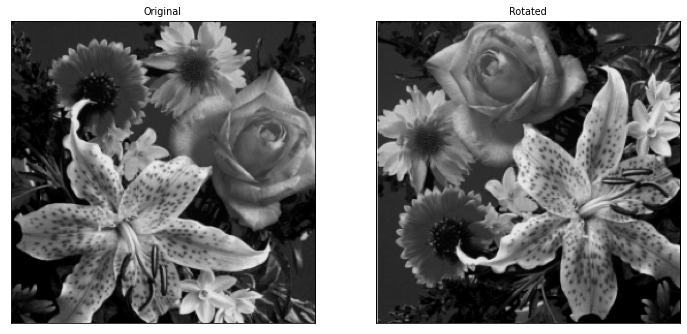

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = cv2.imread('images/FLORES.jpg')
rows,cols,color = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(img,M,(cols,rows))


plt.figure(figsize=(12,6))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Rotated')
plt.xticks([]), plt.yticks([])
plt.show()

## Affine transformation
An affine transformation is any transformation that preserves collinearity, parallelism as well as the ratio of distances between the points (e.g. midpoint of a line remains the midpoint after transformation). It doesn’t necessarily preserve distances and angles.
https://theailearner.com/tag/cv2-getaffinetransform/#:~:text=OpenCV%20provides%20a%20function%20cv2.getAffineTransform%20%28%29%20that%20takes,that%20applies%20an%20affine%20transformation%20to%20an%20image.

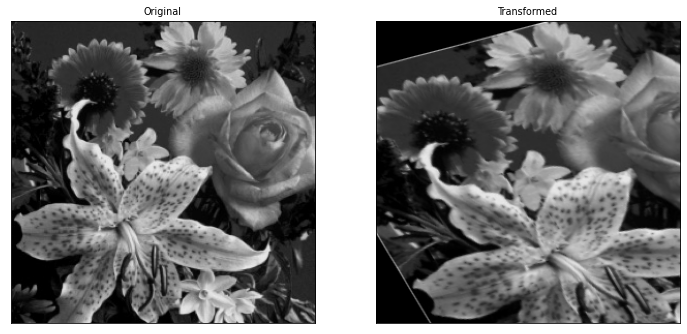

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = cv2.imread('images/FLORES.jpg')
rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

plt.figure(figsize=(12,6))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Transformed')
plt.xticks([]), plt.yticks([])
plt.show()

# Spatial filtering

## Smoothing filter

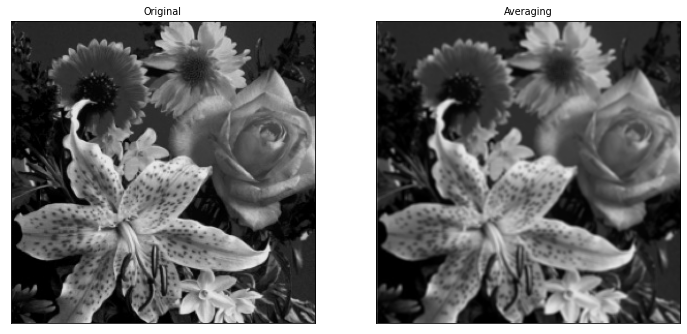

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('images/FLORES.jpg')

kernel = np.ones((3,3), np.float32) * (1/9)

dst = cv2.filter2D(img,-1,kernel)

plt.figure(figsize=(12,6))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

# 1. Sobel and Scharr Derivatives
Sobel operators is a joint Gausssian smoothing plus differentiation operation, so it is more resistant to noise. You can specify the direction of derivatives to be taken, vertical or horizontal (by the arguments, yorder and xorder respectively). You can also specify the size of kernel by the argument ksize. If ksize = -1, a 3x3 Scharr filter is used which gives better results than 3x3 Sobel filter.

# 2. Laplacian Derivatives

It calculates the Laplacian of the image given by the relation, 

$$\Delta src = \frac{\partial ^2{src}}{\partial x^2} + \frac{\partial ^2{src}}{\partial y^2}$$

where each derivative is found using Sobel derivatives. If ksize = 1, then following kernel is used for filtering:

$$\begin{bmatrix}
0 & 1 & 0 \\
1 & -4 & 1 \\
0 & 1 & 0
\end{bmatrix}$$


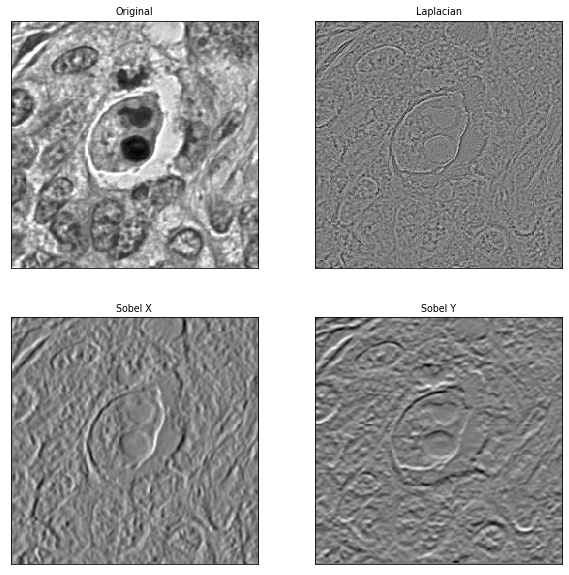

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/1-2556_Brightness.tif', 0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.figure(figsize=(10, 10))
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()